# EDA on Education per County

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, ast
import re

sns.set()
%matplotlib inline

In [15]:
df_education = pd.read_csv("../datasets/education_raw.csv", thousands=',')
df_education = df_education.dropna(how = "all")
df_education.head()

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,City/Suburb/Town/Rural 2013,"Less than a high school diploma, 1970","High school diploma only, 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1007,AL,Bibb County,1.0,1.0,1.0,1.0,City,5272.0,1402.0,...,20.4,7.1,3386.0,7256.0,3848.0,1678.0,20.9,44.9,23.8,10.4
1,1009,AL,Blount County,1.0,1.0,1.0,1.0,City,10677.0,3440.0,...,24.8,9.6,7763.0,13299.0,13519.0,5210.0,19.5,33.4,34.0,13.1
2,1021,AL,Chilton County,1.0,1.0,1.0,1.0,City,10285.0,2805.0,...,20.5,9.9,5474.0,13348.0,7401.0,3823.0,18.2,44.4,24.6,12.7
3,1073,AL,Jefferson County,1.0,1.0,1.0,1.0,City,186882.0,101656.0,...,28.4,24.6,44684.0,118636.0,136299.0,150124.0,9.9,26.4,30.3,33.4
4,1115,AL,St. Clair County,1.0,1.0,1.0,1.0,City,10304.0,3540.0,...,25.6,11.1,9488.0,21849.0,20207.0,9880.0,15.4,35.6,32.9,16.1


## Top 20 Counties with highest percent of adults with advanced degree
* bar plot
* x-axis = Percentage
* y-axis = County

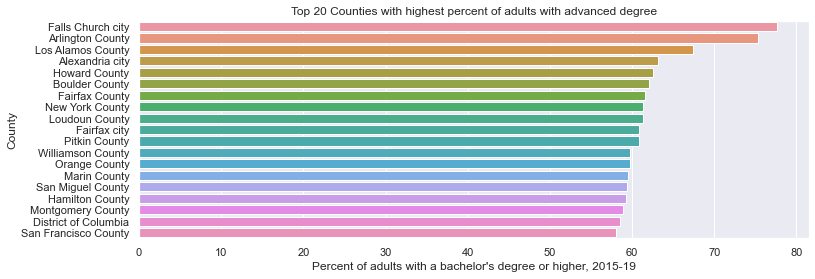

In [16]:
col_name = "Percent of adults with a bachelor's degree or higher, 2015-19"
plot_data = df_education[["Area name", col_name]]\
            .sort_values(by = col_name, ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Area name", x = col_name, orient = 'h').set(
    xlabel = col_name,
    ylabel = "County",
    title = "Top 20 Counties with highest percent of adults with advanced degree"
)
plt.show()

We could see some familiar names, e.g. New York County, Orange Country, DC, and San Francisco. This considers all counties in the U.S., rather than those with large population, so small counties might have a competitive edge.

## Top 20 Counties with lowest percent of adults with advanced degree
* bar plot
* x-axis = Percentage
* y-axis = County

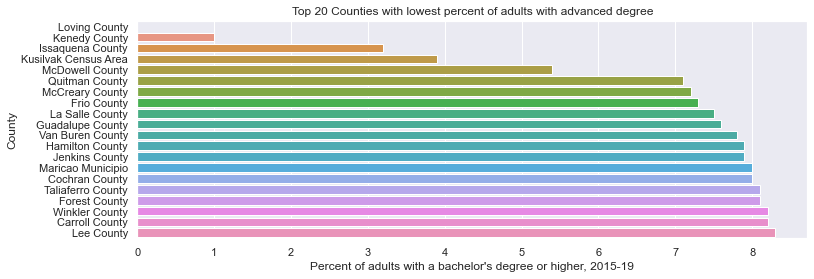

In [17]:
col_name = "Percent of adults with a bachelor's degree or higher, 2015-19"
plot_data = df_education[["Area name", col_name]]\
            .sort_values(by = col_name, ascending = True)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Area name", x = col_name, orient = 'h').set(
    xlabel = col_name,
    ylabel = "County",
    title = "Top 20 Counties with lowest percent of adults with advanced degree"
)
plt.show()

## Distribution of number of adults with advanced degree

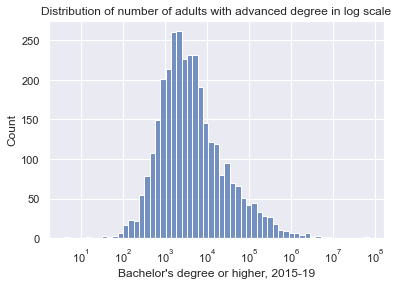

count    3.272000e+03
mean     6.539555e+04
std      1.269397e+06
min      4.000000e+00
25%      1.283250e+03
50%      3.428000e+03
75%      1.147525e+04
max      7.092016e+07
Name: Bachelor's degree or higher, 2015-19, dtype: float64


In [33]:
col_name = "Bachelor's degree or higher, 2015-19"
plot_data = df_education[df_education[col_name] > 0][col_name]
sns.histplot(plot_data, log_scale=True).set(
    title = "Distribution of number of adults with advanced degree in log scale"
)
plt.show()
print(plot_data.describe())

## Top 20 Counties with highest percent of adults (MORE THAN 100k) with advanced degree
* bar plot
* x-axis = Percentage
* y-axis = County

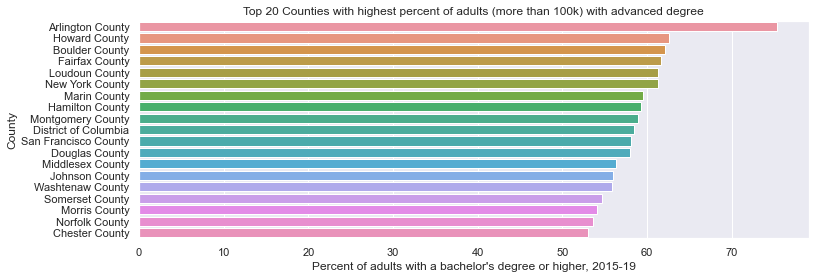

In [35]:
col_name = "Percent of adults with a bachelor's degree or higher, 2015-19"
plot_data = df_education[df_education["Bachelor's degree or higher, 2015-19"] > 100000][["Area name", col_name]]\
            .sort_values(by = col_name, ascending = False)\
            .head(20)

plt.figure(figsize=(12,4))
sns.barplot(data = plot_data, y = "Area name", x = col_name, orient = 'h').set(
    xlabel = col_name,
    ylabel = "County",
    title = "Top 20 Counties with highest percent of adults (more than 100k) with advanced degree"
)
plt.show()